# Data science intern in Oasis Infobyte||Task_1 on IRIS FLOWER CLASSIFICATION|| 

# Internee Name||IMTIAZ AHMAD|| OIB/Y1/IP6884||

In [27]:
# Data manipulation
import pandas as pd
import numpy as np

In [28]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Data preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [102]:
#Apply the KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [103]:
# warnings
import warnings
warnings.filterwarnings('ignore')

# Load the iris dataset

In [104]:
df=pd.read_csv("Iris.csv")

In [105]:
# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

In [106]:
#Get the five row
df.head(n=5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [107]:
#Get the last five row
df.tail(n=5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [108]:
#Get the shape of data 
print("Number of row and columns",df.shape)

Number of row and columns (150, 6)


In [109]:
#To check the name of columns
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'], dtype='object')

# we drop id column because  no need this in because python indexes assign when when we load the dataset

In [110]:
df1=df.drop('Id',axis=1)

In [111]:
# statiscal summary
df1.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [112]:
#To chech the missing values if there is any present in columns
df1.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [113]:
#TO check the duplicated
df1.duplicated().sum()

3

In [114]:
#TO drop the duplicated
df2=df1.drop_duplicates().head()

In [115]:
#Again check the duplicates
df2.duplicated().sum()

0

In [116]:
numerical_features = df2.select_dtypes(include = ['int', 'float']).columns.to_list()

print(f'Total Numerical features = {len(numerical_features)}')

Total Numerical features = 4


In [117]:
categorical_feature = df2.select_dtypes(include = ['object', 'category']).columns.to_list()

print(f'Total Categorical feature = {len(categorical_feature)}')

Total Categorical feature = 1


# Univariate Analysis

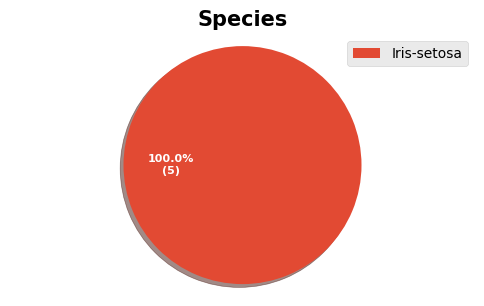

In [118]:
plt.style.use('ggplot')

def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}%\n({next(gen)})"

fig,ax = plt.subplots(figsize = (6,3.4))

df_class = df2['Species'].value_counts().to_frame()
labels = df_class.index.to_list()
values = df_class.iloc[:,0].to_list()
ax.pie(x = values, labels = labels, autopct=autopct_fun(values), shadow = True, textprops = {'color':'white', 'fontsize':8, 'fontweight':'bold'})
ax.legend(labels, loc = 'best')
ax.set_title('Species', fontsize = 15, fontweight = "bold", color = "black")
ax.axis('equal')
fig.show()

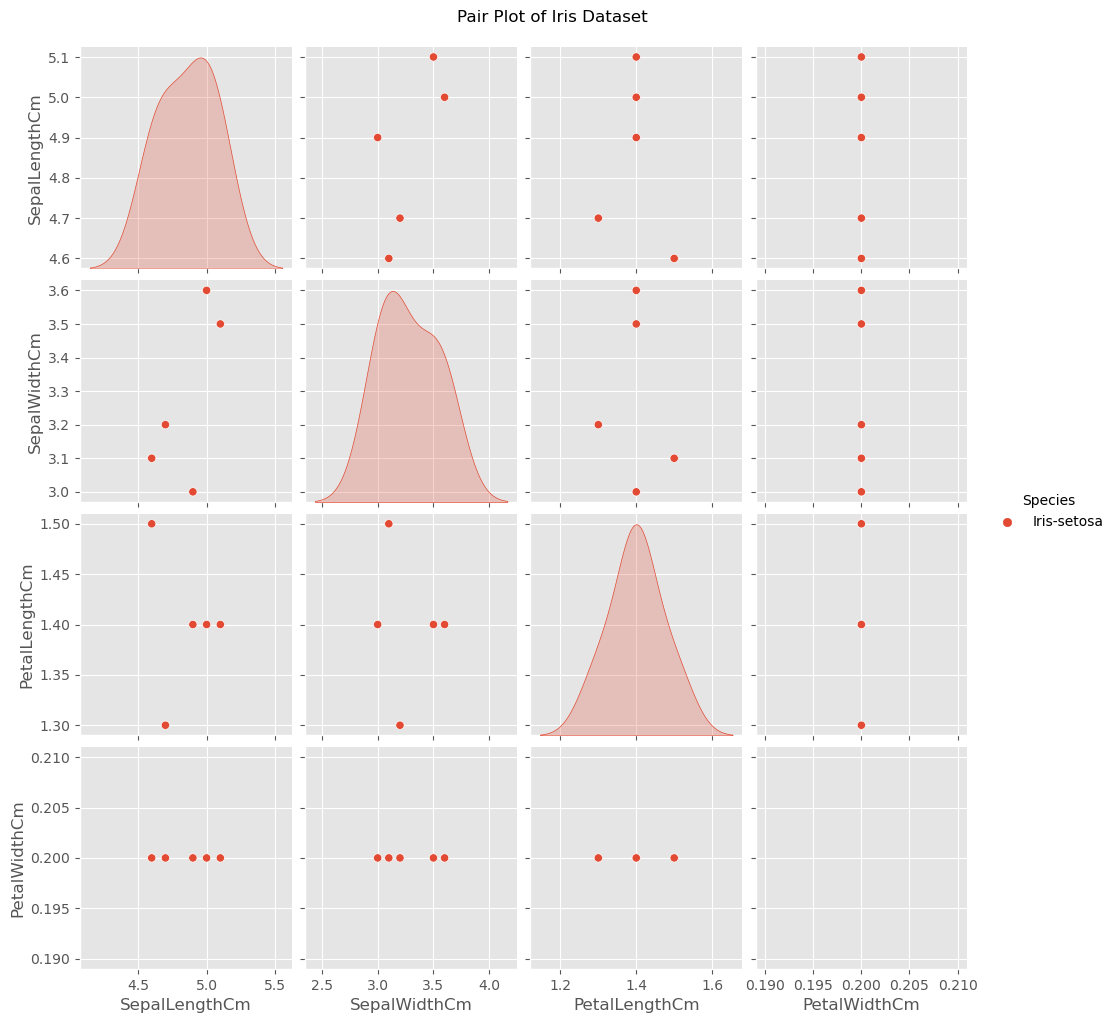

In [119]:
sns.pairplot(df2, hue='Species')
plt.suptitle('Pair Plot of Iris Dataset', y=1.02)
plt.show()

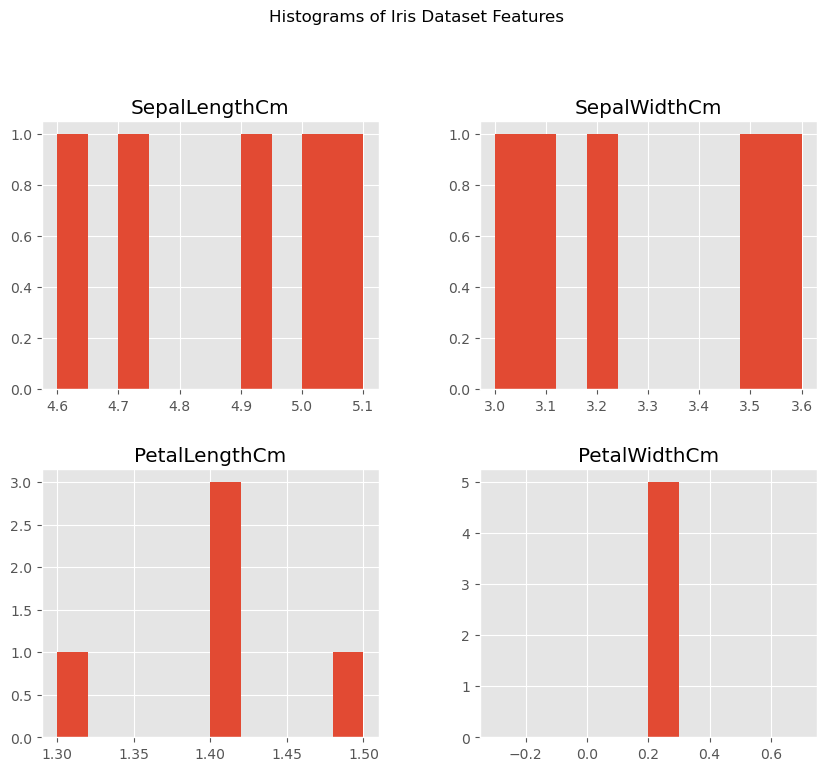

In [120]:
df2.hist(figsize=(10, 8))
plt.suptitle('Histograms of Iris Dataset Features', y=1.02)
plt.show()

# prepare data for modeling

In [121]:
# Splitting data into features and target
X = df2.drop('Species', axis=1)
y = df2['Species']

In [122]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4, 4)
(4,)
(1, 4)
(1,)


In [123]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [124]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=3)

In [125]:
# Predictions
train_preds = knn.predict(X_train_scaled)
test_preds = knn.predict(X_test_scaled)

# Model Evaluation

In [133]:
# Accuracy
accuracy_score(y_test, test_preds)

1.0

In [134]:
report = classification_report(y_test, test_preds)

In [135]:
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

 Iris-setosa       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [1]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, test_preds), annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

NameError: name 'sns' is not defined